In [1]:
import os
import math
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model


Using TensorFlow backend.


In [2]:
def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

BS= 32
TS=(24,24)
train_batch= generator(r'C:\Users\athu3\Desktop\Driver-Drowsiness-Detection-using-Deep-Learning-main\MRL EYE DATA\Prepared_Data\Train',shuffle=True, batch_size=BS,target_size=TS)
test_data= generator(r'C:\Users\athu3\Desktop\Driver-Drowsiness-Detection-using-Deep-Learning-main\MRL EYE DATA\Prepared_Data\Test',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(test_data.classes)//BS

Found 67919 images belonging to 2 classes.
Found 16979 images belonging to 2 classes.


In [3]:
model = load_model('models/cnnCat2.h5')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [4]:
number_of_examples = len(test_data.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * BS)) 
# 1.0 above is to skip integer division

test_labels = []

for i in range(0,int(number_of_generator_calls)):
    test_labels.extend(np.array(test_data[i][1]))

# predicted = model.predict(test_data[0][0])
predicted= []

for i in range(0,int(number_of_generator_calls)):
    predicted.extend(model.predict(test_data[i][0]))
    

print(test_labels[0])
print(predicted[0])
y_pred=np.argmax(predicted, axis=1)
y_test=np.argmax(test_labels, axis=1)


[0. 1.]
[0.00221883 0.9977812 ]


In [5]:
print(test_data[0][0])

[[[[0.4666667 ]
   [0.47058827]
   [0.48235297]
   ...
   [0.5803922 ]
   [0.58431375]
   [0.5764706 ]]

  [[0.47058827]
   [0.48235297]
   [0.4901961 ]
   ...
   [0.5568628 ]
   [0.56078434]
   [0.56078434]]

  [[0.47058827]
   [0.48627454]
   [0.4901961 ]
   ...
   [0.53333336]
   [0.5294118 ]
   [0.5372549 ]]

  ...

  [[0.45098042]
   [0.454902  ]
   [0.454902  ]
   ...
   [0.4784314 ]
   [0.4666667 ]
   [0.46274513]]

  [[0.454902  ]
   [0.45882356]
   [0.454902  ]
   ...
   [0.48235297]
   [0.47058827]
   [0.46274513]]

  [[0.46274513]
   [0.4666667 ]
   [0.4666667 ]
   ...
   [0.48235297]
   [0.48627454]
   [0.47058827]]]


 [[[0.5019608 ]
   [0.48627454]
   [0.4784314 ]
   ...
   [0.3137255 ]
   [0.30980393]
   [0.2901961 ]]

  [[0.49803925]
   [0.5019608 ]
   [0.5058824 ]
   ...
   [0.3254902 ]
   [0.30980393]
   [0.28235295]]

  [[0.48627454]
   [0.4784314 ]
   [0.4901961 ]
   ...
   [0.32156864]
   [0.32156864]
   [0.28235295]]

  ...

  [[0.29803923]
   [0.32941177]
   [0.3

In [6]:
from sklearn.metrics import accuracy_score
AccScore = accuracy_score(y_pred, y_test)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.9876317804346546


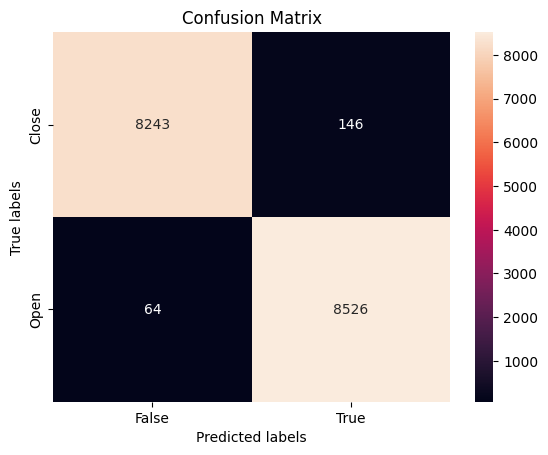

In [7]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

ax= plt.subplot()
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['False', 'True']); ax.yaxis.set_ticklabels(['Close', 'Open']);

In [8]:
from sklearn.metrics import classification_report

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      8389
           1       0.98      0.99      0.99      8590

    accuracy                           0.99     16979
   macro avg       0.99      0.99      0.99     16979
weighted avg       0.99      0.99      0.99     16979



In [9]:
test_features=[]
for i in range(0,int(number_of_generator_calls)):
    test_features.extend(np.array(test_data[i][0]))

In [13]:
model_evaluation_history = model.evaluate(y_pred, test_labels)

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (16979, 1)

In [ ]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Get the Epochs Count
    epochs = range(len(metric_value_1))
 
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'orange', label = metric_name_2)
 
    plt.title(str(plot_name))
 
    plt.legend()